In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.quality = df.quality.map({3:0,4:1,5:2,6:3,7:4,8:5})

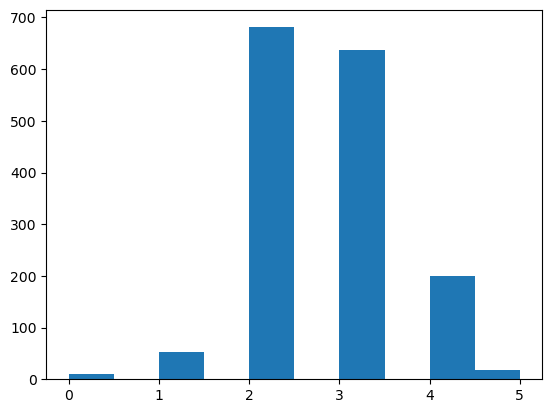

In [4]:
plt.hist(df.quality)
plt.show()

In [5]:
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,3
1,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5,2
2,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,3
3,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,2
4,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.1,0.600,0.00,1.90,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,3
1595,8.2,0.635,0.10,2.10,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,3
1596,7.2,0.620,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,2
1597,7.9,0.200,0.35,1.70,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,4


In [19]:
# split the test and train
df_train = df.head(1000)
df_test = df.tail(599)

In [7]:
# separate the predictions 
x_train,x_test = df_train.drop('quality',axis = 1), df_test.drop('quality',axis = 1)
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.7,0.560,0.08,2.50,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
1,7.8,0.500,0.17,1.60,0.082,21.0,102.0,0.99600,3.39,0.48,9.5
2,10.7,0.670,0.22,2.70,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
3,8.5,0.460,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8
4,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
...,...,...,...,...,...,...,...,...,...,...,...
995,8.9,0.590,0.50,2.00,0.337,27.0,81.0,0.99640,3.04,1.61,9.5
996,6.6,0.725,0.09,5.50,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
997,7.7,0.430,0.25,2.60,0.073,29.0,63.0,0.99615,3.37,0.58,10.5
998,8.3,0.850,0.14,2.50,0.093,13.0,54.0,0.99724,3.36,0.54,10.1


In [8]:
# separate the target variable
y_train, y_test = df_train.quality, df_test.quality
y_train

0      3
1      2
2      3
3      2
4      3
      ..
995    3
996    3
997    3
998    2
999    3
Name: quality, Length: 1000, dtype: int64

In [23]:
#decision tree (try with max_depth =3 initially)
clf = tree.DecisionTreeClassifier(max_depth = 3)
#train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
# get predictions
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

In [25]:
# accuracy
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
print('train accuracy:', "{:.3f}".format(train_accuracy))
print('test accuracy:', "{:.3f}".format(test_accuracy))

train accuracy: 0.579
test accuracy: 0.554


In [74]:
def accuracy_tree(max_depth):
    #decision tree (try with max_depth =3 initially)
    clf = tree.DecisionTreeClassifier(max_depth = max_depth)
    #train the model
    clf.fit(x_train,y_train)
    # get predictions
    train_predictions = clf.predict(x_train)
    test_predictions = clf.predict(x_test)
    # accuracy
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)
    return train_accuracy, test_accuracy
accuracy_tree(3)

(0.579, 0.5542570951585977)

In [75]:
ac = map(accuracy_tree, range(1,30))
accuracy_df = pd.DataFrame(ac,columns = ['train','test'])
accuracy_df['max_depth'] = accuracy_df.index
accuracy_df

,train,test,max_depth
0,0.541,0.574290,0
1,0.549,0.564274,1
2,0.579,0.554257,2
3,0.619,0.572621,3
4,0.654,0.594324,4
5,0.680,0.580968,5
6,0.739,0.587646,6
7,0.809,0.575960,7
8,0.870,0.574290,8
9,0.931,0.622705,9


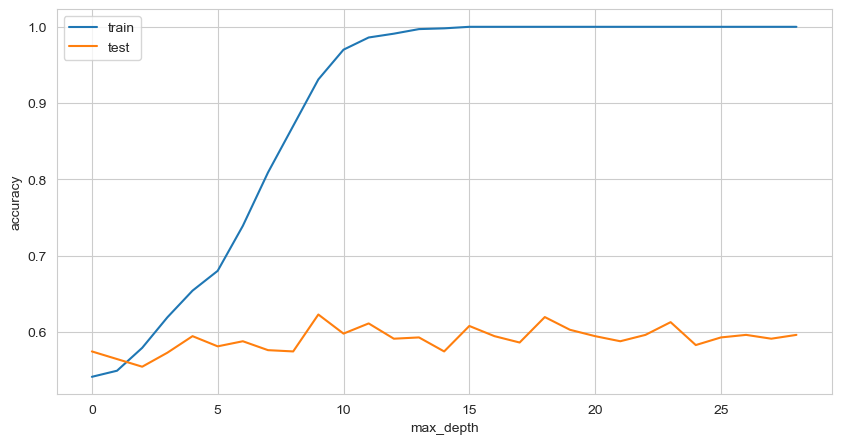

In [77]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot('max_depth','train',data = accuracy_df,label = 'train')
plt.plot('max_depth','test',data = accuracy_df,label = 'test')
plt.legend(loc = 'best')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()